<a href="https://colab.research.google.com/github/M-Amrollahi/Personal-Notes/blob/master/ML-notes/how_rnn_works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torchinfo

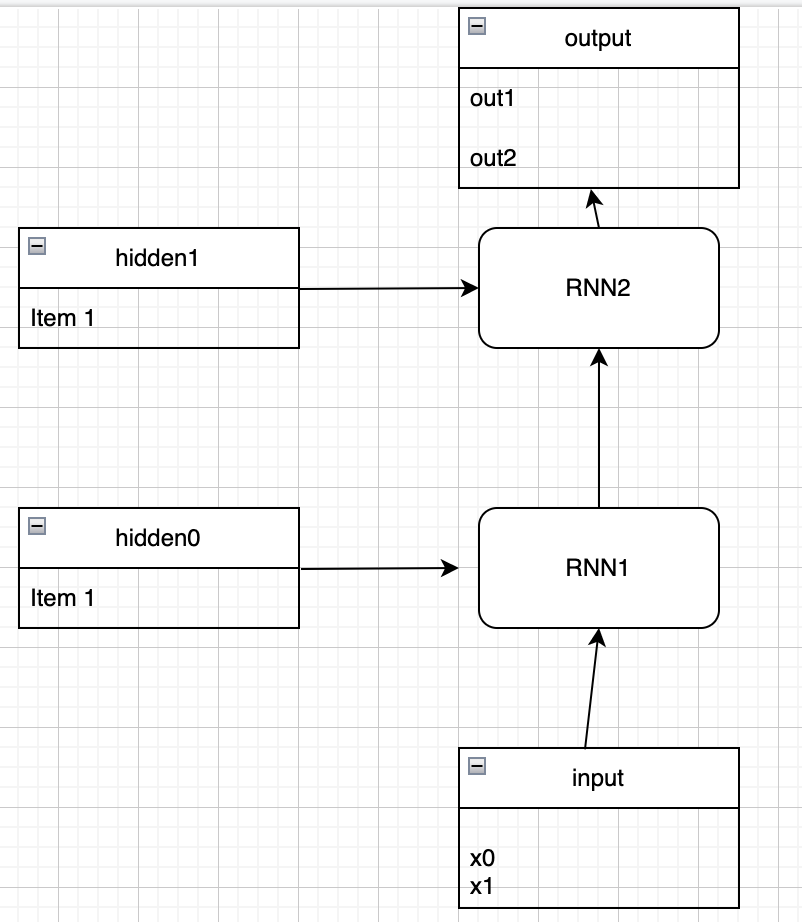

In [38]:
rnn = nn.RNN(input_size=10, hidden_size=40,num_layers=2)
input = torch.randn(2,10)
h0 = torch.randn(2,40)
output, hn = rnn(input, h0)

## output is always the same size as hidden
## number of layers should fit the initial hidden states
## input size and hidden size can vary


In [39]:
output.shape

torch.Size([2, 40])

In [40]:
hn.shape

torch.Size([2, 40])

In [41]:
rnn.weight_ih_l0.shape

torch.Size([40, 10])

In [42]:
rnn.weight_hh_l0.shape

torch.Size([40, 40])

In [43]:
output

tensor([[ 0.2734,  0.1968,  0.8583,  0.2642,  0.1660,  0.0573, -0.2342,  0.0908,
          0.1210, -0.8409,  0.8746,  0.0436,  0.1407,  0.4988, -0.2073,  0.0791,
          0.3143, -0.8989,  0.9148,  0.4291, -0.1669,  0.1177, -0.0253, -0.6632,
         -0.1020, -0.5105, -0.6152,  0.3549,  0.1517,  0.3448, -0.4237,  0.5940,
         -0.2229, -0.6789,  0.5750, -0.7214, -0.3602,  0.3342, -0.0428,  0.1280],
        [-0.3081,  0.4816,  0.1956, -0.1624, -0.1976, -0.2183,  0.4013,  0.0649,
         -0.4483,  0.6075, -0.1705,  0.0978, -0.5621, -0.2656, -0.2911,  0.0157,
          0.3863,  0.3205, -0.1007, -0.2985, -0.0060,  0.1375, -0.0672, -0.0479,
          0.2781, -0.0864,  0.0274,  0.2641, -0.4196,  0.2948,  0.5119,  0.0622,
         -0.4415, -0.0391, -0.0751, -0.1529, -0.1836,  0.0552, -0.2296, -0.4214]],
       grad_fn=<SqueezeBackward1>)

In [44]:
rnn.state_dict().keys()

odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0', 'weight_ih_l1', 'weight_hh_l1', 'bias_ih_l1', 'bias_hh_l1'])

# For the first RNN unit

input0 , h[0] -> rn0 -> output0

In [45]:
a1 = torch.tanh(input[0]@rnn.weight_ih_l0.T + rnn.bias_ih_l0 + h0[0]@rnn.weight_hh_l0.T + rnn.bias_hh_l0)
a1

tensor([-0.8254, -0.1038, -0.5824,  0.6978, -0.3487, -0.7406, -0.6844,  0.6860,
         0.1329,  0.1712,  0.5268, -0.3758, -0.1589, -0.8765,  0.0064,  0.3562,
         0.8838, -0.1350,  0.7369, -0.3665,  0.6810,  0.5573,  0.0321, -0.6307,
        -0.5411, -0.6336,  0.1863,  0.5859,  0.3852,  0.6050,  0.1313, -0.4388,
         0.4280, -0.0687,  0.2753, -0.6610, -0.3404, -0.3308, -0.4057, -0.1562],
       grad_fn=<TanhBackward0>)

output0, h[1] -> rnn1 -> output1

In [46]:
a2 = torch.tanh(a1@rnn.weight_ih_l1.T + rnn.bias_ih_l1 + h0[1]@rnn.weight_hh_l1.T + rnn.bias_hh_l1)
a2

tensor([ 0.2734,  0.1968,  0.8583,  0.2642,  0.1660,  0.0573, -0.2342,  0.0908,
         0.1210, -0.8409,  0.8746,  0.0436,  0.1407,  0.4988, -0.2073,  0.0791,
         0.3143, -0.8989,  0.9148,  0.4291, -0.1669,  0.1177, -0.0253, -0.6632,
        -0.1020, -0.5105, -0.6152,  0.3549,  0.1517,  0.3448, -0.4237,  0.5940,
        -0.2229, -0.6789,  0.5750, -0.7214, -0.3602,  0.3342, -0.0428,  0.1280],
       grad_fn=<TanhBackward0>)

input[1], output0 -> rnn0 -> output3

In [47]:
a3 = torch.tanh(input[1]@rnn.weight_ih_l0.T + rnn.bias_ih_l0 + a1@rnn.weight_hh_l0.T + rnn.bias_hh_l0)
a3

tensor([-0.3405,  0.1473,  0.5515,  0.6717, -0.0907,  0.0055,  0.2465, -0.1045,
         0.3416, -0.1948,  0.1905,  0.4114,  0.1255,  0.1958,  0.3165,  0.0168,
         0.0030, -0.0992, -0.7092, -0.1323,  0.2353, -0.0594,  0.3313,  0.3825,
        -0.0031,  0.2096, -0.5807, -0.3995,  0.1968,  0.2961,  0.0906, -0.5607,
        -0.3223, -0.3402, -0.5172,  0.2005,  0.3673,  0.0258, -0.2439,  0.0278],
       grad_fn=<TanhBackward0>)


output3, output1 -> rnn1 -> output4

In [48]:
a4 = torch.tanh(a3@rnn.weight_ih_l1.T + rnn.bias_ih_l1 + a2@rnn.weight_hh_l1.T + rnn.bias_hh_l1)
a4

tensor([-0.3081,  0.4816,  0.1956, -0.1624, -0.1976, -0.2183,  0.4013,  0.0649,
        -0.4483,  0.6075, -0.1705,  0.0978, -0.5621, -0.2656, -0.2911,  0.0157,
         0.3863,  0.3205, -0.1007, -0.2985, -0.0060,  0.1375, -0.0672, -0.0479,
         0.2781, -0.0864,  0.0274,  0.2641, -0.4196,  0.2948,  0.5119,  0.0622,
        -0.4415, -0.0391, -0.0751, -0.1529, -0.1836,  0.0552, -0.2296, -0.4214],
       grad_fn=<TanhBackward0>)